<center>
# ПРИЛОЖЕНИЕ 5
<center>
# РЕШЕНИЕ ДОМАШНЕГО ЗАДАНИЯ 1

# Этап I. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса LogisticRegression

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

## I.1. Загрузка исторических данных

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/Churn_logreg.csv', 
                   encoding='cp1251', sep=';')

## I.2. Вывод общей информации о датафрейме

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


## I.3. Изменение типов переменных

In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    data[i] = data[i].str.replace(',', '.').astype('float')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


## I.4. Получение подробной информации о количественных и категориальных переменных

In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [8]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn, создав список
# категориальных переменных
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital
count,4430,4427,4429,4430,4427
unique,2,2,4,4,5
top,Нет,Бюджетный,CC,Женский,Женат
freq,3054,2244,2561,2240,2620


In [9]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan 'Женский&*' 'Мужской&*']
['Женат' 'Одинокий' nan '_Одинокий' '_Женат' 'Же&нат']


In [10]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский      2240
Мужской      2183
Женский&*       4
Мужской&*       3
NaN             1
Name: gender, dtype: int64
Женат        2620
Одинокий     1800
NaN             4
_Женат          3
_Одинокий       2
Же&нат          2
Name: marital, dtype: int64


## I.5. Нормализация строковых значений и обработка редких категорий

In [11]:
# удаляем лишние символы в категориях переменных
# gender и marital
for i in ['gender', 'marital']:
    data[i] = data[i].str.replace('[*&_]', '')

# смотрим результаты
for i in ['gender', 'marital']:
    print(data[i].value_counts(dropna=False))

Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64


In [12]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna=False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

## I.6. Конструирование признаков

In [13]:
# пишем функцию, создающую парные взаимодействия
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [14]:
# применяем функцию
make_conj(data, 'gender', 'marital')

In [15]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age'] / data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace=True)

In [16]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio2'] = data['longdist'] / data['internat']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)

In [17]:
# поделим доход на возраст
data['ratio3'] = data['income'] / data['age']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [18]:
# поделим возраст на количество детей
data['ratio4'] = data['age'] / data['children']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)

## I.7. Разбиение набора данных на обучающую и контрольную выборки

In [19]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

## I.8. Импутация пропусков

In [20]:
# выводим информацию о количестве пропусков
# по каждой переменной в полученных выборках
print(train.isnull().sum())
print(test.isnull().sum())

longdist            1
internat            4
local               2
int_disc            0
billtype            4
pay                 2
age                 2
gender              1
marital             3
children            1
income              1
churn               0
gender_marital      3
ratio               3
ratio2            336
ratio3              2
ratio4              2
dtype: int64
longdist            0
internat            0
local               1
int_disc            1
billtype            0
pay                 0
age                 1
gender              0
marital             1
children            0
income              0
churn               0
gender_marital      1
ratio               1
ratio2            161
ratio3              1
ratio4              1
dtype: int64


In [21]:
# заменяем пропуски в количественных переменных средними, создав
# список количественных переменных для работы с циклом
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(train[i].mean(), inplace=True)

In [22]:
# заменяем пропуски в категориальных переменных модой, не забываем пересоздать список
# категориальных предикторов для работы с циклом, потому что появилась новая переменная
# gender_marital и в ней есть пропуски, нуждающиеся в импутации
categorical_columns = [c for c in train.loc[:, train.columns != 'churn'] if data[c].dtype.name == 'object']
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

## I.9. Нормализация

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


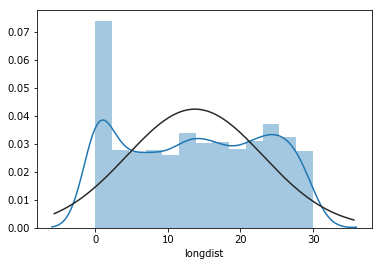

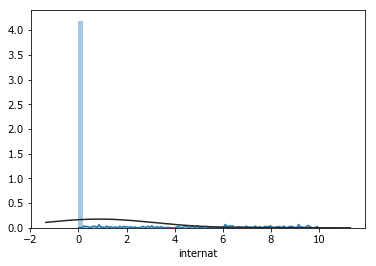

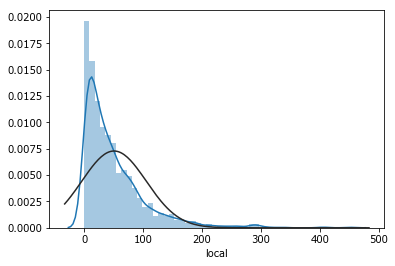

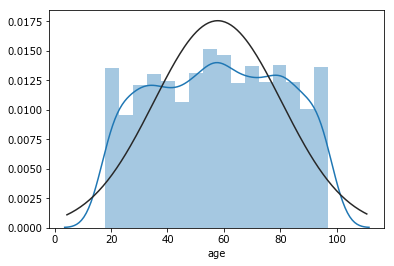

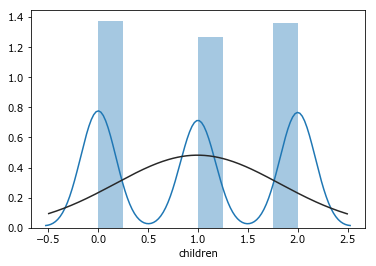

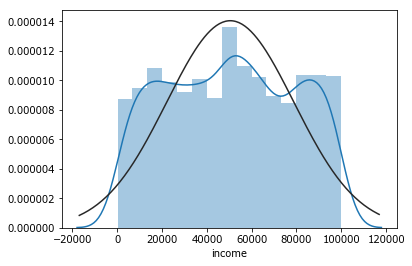

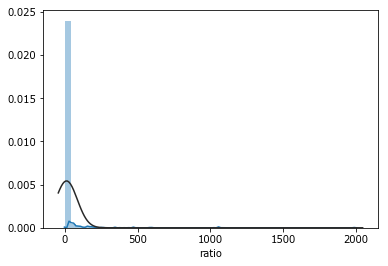

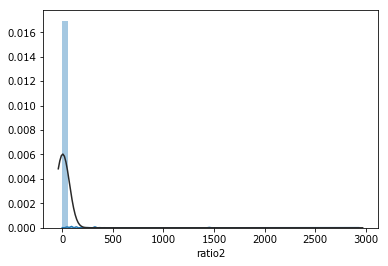

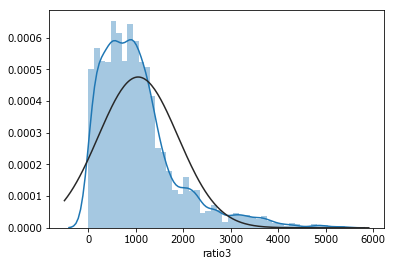

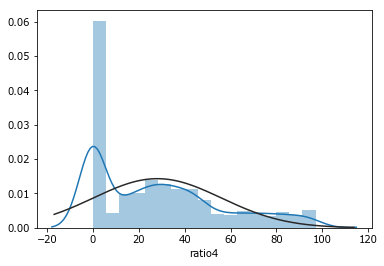

<Figure size 432x288 with 0 Axes>

In [23]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения 
# для количественных переменных
for i in numerical_columns:
    sns.distplot(train[i], fit=norm)
    fig = plt.figure()    

In [24]:
# подготавливаем данные перед преобразованием Бокса-Кокса
# (данные должны быть положительными)
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [25]:
# выполняем преобразование Бокса-Кокса
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

In [26]:
# пишем функцию, выполняющую биннинг
def user_bin(train, number):
    tv = 'churn'
    col_list = []  
    iv_list = []
    bins_list = [] 
    groups_list = []      
    a= 0.01  
    for var_name in train: 
        # используем для биннинга переменные с более чем 24 уникальными значениями 
        if(len(train[var_name].unique()) >= 24):
            col_list.append(var_name)  
    print('У нас ' + str(len(col_list)) + ' переменных, пригодных для биннинга')    
    for var_name in col_list:  
        num = number  
        bins = np.linspace(train[var_name].min(), train[var_name].max(), num) 
        rounded_bins = np.round(bins, 2)
        groups = np.digitize(train[var_name], bins)        
        biv = pd.crosstab(groups, train[tv])   
        # умножаем на 1.0, чтобы преобразовать во float и добавляем "a=0.01", 
        # чтобы избежать деления на ноль
        IV = sum(((1.0 * biv['Остается'] / sum(biv['Остается']) + a) - (
            1.0 * biv['Уходит'] / sum(biv['Уходит']) + a)) * np.log(
            (1.0 * biv['Остается'] / sum(biv['Остается']) + a) / (1.0 * biv['Уходит'] / sum(biv['Уходит']) + a)))
        iv_list.append(IV) 
        bins_list.append(num)        
        groups_list.append(rounded_bins)
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV': iv_list,
                           'Количество_бинов': bins_list})    
    return(result.sort_values(by='IV', ascending=False))

In [27]:
# увеличиваем ширину столбцов
pd.set_option('max_colwidth', 800)

In [28]:
# применяем функцию, разбивая каждую переменную,
# пригодную для биннинга, на 10 категорий
user_bin(train, 4)

У нас 9 переменных, пригодных для биннинга


,Переменная,Бины,IV,Количество_бинов
2,local,"[-2.16, 3.06, 8.28, 13.5]",0.163829,4
0,longdist,"[-1.46, 2.75, 6.97, 11.18]",0.154344,4
5,ratio,"[-0.49, 0.56, 1.6, 2.64]",0.100631,4
7,ratio3,"[1.25, 19.06, 36.87, 54.68]",0.048407,4
3,age,"[11.4, 23.43, 35.46, 47.49]",0.045934,4
4,income,"[40.64, 2003.91, 3967.18, 5930.45]",0.016762,4
8,ratio4,"[-0.64, 2.42, 5.47, 8.53]",0.015552,4
6,ratio2,"[-9.01, -5.41, -1.8, 1.81]",0.012908,4
1,internat,"[-13.08, -8.22, -3.35, 1.51]",0.003971,4


In [29]:
# создадим бины для переменной longdist
bins = [-np.inf, 2.75, 6.97, np.inf]
# выполняем биннинг переменной longdist
train['longdistcat'] = pd.cut(train['longdist'], bins).astype('object')
test['longdistcat'] = pd.cut(test['longdist'], bins).astype('object')

In [30]:
# напишем функцию для создания взаимодействия между 
# исходными категориальными признаки и переменными, 
# полученными в результате биннинга
def make_conj2(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('str') + " + " + df[feature2].astype('str')

In [31]:
# применяем написанную функцию
make_conj2(train, 'pay', 'gender_marital')
make_conj2(test, 'pay', 'gender_marital')

make_conj2(train, 'gender', 'longdistcat')
make_conj2(test, 'gender', 'longdistcat')

## I.10. Стандартизация

In [32]:
# выполняем стандартизацию количественных переменных
train_copy = train.copy()
for i in numerical_columns:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

## I.11. Проверка наличия пропусков

In [33]:
# смотрим пропуски
print(train.isnull().sum())
print(test.isnull().sum())

longdist              0
internat              0
local                 0
int_disc              0
billtype              0
pay                   0
age                   0
gender                0
marital               0
children              0
income                0
churn                 0
gender_marital        0
ratio                 0
ratio2                0
ratio3                0
ratio4                0
longdistcat           0
pay_gender_marital    0
gender_longdistcat    0
dtype: int64
longdist              0
internat              0
local                 0
int_disc              0
billtype              0
pay                   0
age                   0
gender                0
marital               0
children              0
income                0
churn                 0
gender_marital        0
ratio                 0
ratio2                0
ratio3                0
ratio4                0
longdistcat           0
pay_gender_marital    0
gender_longdistcat    0
dtype: int64


## I.12. Дамми-кодирование

In [34]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'longdistcat', 'pay_gender_marital', 'gender_longdistcat'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий', 'longdistcat_(-inf, 2.75]', 'longdistcat_(2.75, 6.97]', 'longdistcat_(6.97, inf]', 'pay_gender_marital_Auto + Женский + Женат', 'pay_gender_marital_Auto + Женский + Одинокий', 'pay_gender_marital_Auto + Мужской + Женат', 'pay_gender_marital_Auto 

## I.13. Подготовка массивов признаков и массивов меток

In [35]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# создаем обучающий и контрольный массивы признаков
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
X_train = train_dummies.loc[:, 'longdist':'gender_longdistcat_Мужской + (6.97, inf]']
X_test = test_dummies.loc[:, 'longdist':'gender_longdistcat_Мужской + (6.97, inf]']

## I.14. Обучение модели логистической регрессии

In [36]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression 
# (по сути задаем модель) и обучаем
logreg = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
# печатаем значения правильности
print("Правильность на обучающей выборке: {:.3f}".format(
    logreg.score(X_train, y_train)))
print("Правильность на контрольной выборке: {:.3f}".format(
    logreg.score(X_test, y_test)))

Правильность на обучающей выборке: 0.821
Правильность на контрольной выборке: 0.823


In [37]:
# импортируем функцию roc_auc_score для вычисления AUC
from sklearn.metrics import roc_auc_score
# печатаем значения AUC
print("AUC на обучающей выборке: {:.3f}".format(
    roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.890
AUC на контрольной выборке: 0.890


## I.19. Получение информации о регрессионных и экспоненциальных коэффициентах

In [38]:
# взглянем на коэффициенты логистической регрессии,
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg.coef_
feat_labels = X_train.columns

In [39]:
# вычислим свободный член (константу)
intercept = logreg.intercept_
intercept

array([-0.51093911])

In [40]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-0.51

In [41]:
# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Коэффициенты"
print("Коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))

Константа: -0.51
Коэффициенты:
longdist -0.83
internat 1.11
local -0.08
age 0.01
children -0.18
income 0.52
ratio -0.7
ratio2 0.29
ratio3 -0.93
ratio4 0.18
int_disc_Да -0.06
int_disc_Нет 0.06
billtype_Бесплатный 0.04
billtype_Бюджетный -0.04
pay_Auto -0.26
pay_CC 0.13
pay_CH 0.12
gender_Женский 0.9
gender_Мужской -0.91
marital_Женат 0.01
marital_Одинокий -0.02
gender_marital_Женский + Женат 0.26
gender_marital_Женский + Одинокий 0.2
gender_marital_Мужской + Женат -0.25
gender_marital_Мужской + Одинокий -0.22
longdistcat_(-inf, 2.75] 0.11
longdistcat_(2.75, 6.97] -0.09
longdistcat_(6.97, inf] -0.02
pay_gender_marital_Auto + Женский + Женат 0.49
pay_gender_marital_Auto + Женский + Одинокий -0.07
pay_gender_marital_Auto + Мужской + Женат 0.04
pay_gender_marital_Auto + Мужской + Одинокий -0.71
pay_gender_marital_CC + Женский + Женат -0.09
pay_gender_marital_CC + Женский + Одинокий 0.22
pay_gender_marital_CC + Мужской + Женат -0.02
pay_gender_marital_CC + Мужской + Одинокий 0.02
pay_gender_

In [42]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспоненциальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.51
Экспоненциальные коэффициенты:
longdist 0.436
internat 3.04
local 0.924
age 1.015
children 0.839
income 1.687
ratio 0.495
ratio2 1.341
ratio3 0.393
ratio4 1.201
int_disc_Да 0.939
int_disc_Нет 1.064
billtype_Бесплатный 1.041
billtype_Бюджетный 0.96
pay_Auto 0.775
pay_CC 1.14
pay_CH 1.132
gender_Женский 2.472
gender_Мужской 0.404
marital_Женат 1.015
marital_Одинокий 0.984
gender_marital_Женский + Женат 1.3
gender_marital_Женский + Одинокий 1.227
gender_marital_Мужской + Женат 0.781
gender_marital_Мужской + Одинокий 0.802
longdistcat_(-inf, 2.75] 1.116
longdistcat_(2.75, 6.97] 0.911
longdistcat_(6.97, inf] 0.982
pay_gender_marital_Auto + Женский + Женат 1.629
pay_gender_marital_Auto + Женский + Одинокий 0.929
pay_gender_marital_Auto + Мужской + Женат 1.041
pay_gender_marital_Auto + Мужской + Одинокий 0.492
pay_gender_marital_CC + Женский + Женат 0.913
pay_gender_marital_CC + Женский + Одинокий 1.248
pay_gender_marital_CC + Мужской + Женат 0.976
pay_gender_marital_CC + Муж

## I.20. Поиск оптимального значения силы регуляризации

In [43]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(solver='lbfgs', max_iter=200, 
                                 penalty='l2', random_state=42)
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid_logreg = {'C': [0.2, 0.4, 0.6, 0.8, 1]}
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid_logreg, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=skf)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.890
Наилучшее значение гиперпараметра C: {'C': 0.6}
Наилучшее значение AUC: 0.885


# Этап II. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса LogisticRegression

## II.1. Загрузка исторических данных

In [44]:
# записываем CSV-файл в объект DataFrame
fulldata = pd.read_csv('Data/Churn_logreg.csv', 
                       encoding='cp1251', sep=';')

## II.2. Предварительная обработка исторических данных

In [45]:
# пишем функцию, выполняющую предварительную обработку
# исторических данных
def preprocessing(df):
    # заменяем запятые на точки и преобразуем в тип float
    for i in ['longdist', 'internat', 'local', 'income']:
        df[i] = df[i].str.replace(',', '.').astype('float')
    # удаляем возможные лишние символы (все символы, не являющиеся 
    # буквами, символы нижнего подчеркивания и цифры) в категориях 
    # переменных gender и marital
    for i in ['gender', 'marital']:
        df[i] = df[i].str.replace('[\d+\W_]', '')
    # все новые категории переменной pay заменяем модой
    replace_new_values = lambda s: 'CC' if s not in ['CC', 'Auto', 'CH', np.NaN] else s
    df['pay'] = df['pay'].map(replace_new_values)
    # создаем переменную - результат конъюнкции
    df['gender_marital'] = df['gender'].astype('object') + " + " + df['marital'].astype('object')
    # поделим возраст на длительность междугородних звонков в минутах
    df['ratio'] = df['age'] / df['longdist']
    # заменяем бесконечные значения на 1
    df['ratio'].replace([np.inf, -np.inf], 1, inplace=True)
    # поделим длительность междугородних звонков в минутах на
    # длительность международных звонков в минутах
    df['ratio2'] = df['longdist'] / df['internat']
    # заменяем бесконечные значения на 0
    df['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим доход на возраст
    df['ratio3'] = df['income'] / df['age']
    # заменяем бесконечные значения на 0
    df['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)
    # поделим возраст на количество детей
    df['ratio4'] = df['age'] / df['children']
    # заменяем бесконечные значения на 0
    df['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)
    # заменяем пропуски в количественных переменных средними, создав
    # список количественных переменных для работы с циклом
    numerical_columns = df.dtypes[df.dtypes != 'object'].index 
    for i in numerical_columns:
        df[i].fillna(df[i].mean(), inplace=True)
    # заменяем пропуски в категориальных переменных модами, создав
    # список категориальных переменных для работы с циклом
    categorical_columns = df.dtypes[df.dtypes == 'object'].index 
    for i in categorical_columns:
        df[i].fillna(df[i].value_counts().index[0], inplace=True)
    # подготавливаем данные перед преобразованием Бокса-Кокса
    # (данные должны быть положительными)
    df.replace({0: 0.5}, inplace=True)
    # выполняем преобразование Бокса-Кокса
    for i in numerical_columns:  
        df[i], fitted_lambda = boxcox(df[i])    
    # создадим бины для переменной longdist
    bins = [-np.inf, 2.75, 6.97, np.inf]
    # выполняем биннинг переменной longdist
    df['longdistcat'] = pd.cut(df['longdist'], bins).astype('object')
    # создаем переменные-взаимодействия
    df['pay_gender_marital'] = df['pay'].astype('str') + " + " + df['gender_marital'].astype('str')
    df['gender_longdistcat'] = df['gender'].astype('str') + " + " + df['longdistcat'].astype('str')

In [46]:
# применяем функцию предварительной обработки 
# ко всем историческим данным
preprocessing(fulldata)

In [47]:
fulldata_copy = fulldata.copy()
# выполняем стандартизацию
for i in numerical_columns:    
    fulldata[i] = (fulldata[i] - fulldata[i].mean()) / fulldata[i].std()

In [48]:
# выполняем дамми-кодирование
fulldata_dummies = pd.get_dummies(fulldata)
# создаем обучающий массив меток
y = fulldata_dummies.loc[:, 'churn_Уходит'] 
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной
fulldata_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)   
# создаем обучающий массив признаков
X = fulldata_dummies.loc[:, 'longdist':'gender_longdistcat_Мужской + (6.97, inf]']

## II.3. Обучение модели логистической регрессии на всех исторических данных

In [49]:
# обучаем модель
full_logreg = LogisticRegression(C=0.6, solver='lbfgs', max_iter=200, penalty='l2').fit(X, y)
print("AUC на всей исторической выборке: {:.3f}".format(
    roc_auc_score(y, full_logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.891


## II.4. Загрузка новых данных

In [50]:
# записываем CSV-файл, содержащий новые данные,
# в объект DataFrame
newdata = pd.read_csv('Data/Churn_new.csv', 
                      encoding='utf-8', sep=';')

## II.5. Предварительная обработка новых данных

In [51]:
# выполняем предварительную обработку
# новых данных
preprocessing(newdata)

In [52]:
# выполняем стандартизацию количественных переменных 
for i in numerical_columns:
    newdata[i] = (newdata[i] - fulldata_copy[i].mean()) / fulldata_copy[i].std()

In [53]:
# выполняем дамми-кодирование
# новых данных
newdata_dummies = pd.get_dummies(newdata)

## II.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [54]:
# вычисляем вероятности классов для новых данных
prob = full_logreg.predict_proba(newdata_dummies)
# выведем вероятности для первых 5 наблюдений
prob[:5]

array([[0.03151826, 0.96848174],
       [0.02974341, 0.97025659],
       [0.95014199, 0.04985801],
       [0.95380301, 0.04619699],
       [0.00978692, 0.99021308]])

In [55]:
# создаем на основе вероятностей датафрейм
probabilities = pd.DataFrame(prob, index=newdata.index, columns=['Prob0', 'Prob1'])
# конкатенируем датафрейм с исходными переменными и датафрейм с вероятностями
result = pd.concat([newdata, probabilities], axis=1)
result.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,...,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,pay_gender_marital,gender_longdistcat,Prob0,Prob1
0,1.432476,2.574073,0.457483,Нет,Бюджетный,CH,-1.982914,Женский,Одинокий,0.021848,...,Женский + Одинокий,-0.975133,1.128119,2.348438,0.655148,"(6.97, inf]",CH + Женский + Одинокий,"Женский + (6.97, inf]",0.031518,0.968482
1,1.299037,2.496011,-0.229161,Да,Бесплатный,CH,-1.827545,Женский,Женат,1.211767,...,Женский + Женат,-0.602935,1.145414,2.028234,0.287901,"(6.97, inf]",CH + Женский + Женат,"Женский + (6.97, inf]",0.029743,0.970257
2,0.276202,-0.262546,0.392617,Да,Бесплатный,CH,-1.627641,Мужской,Женат,-1.214628,...,Мужской + Женат,0.262985,-0.618638,0.699691,-1.287665,"(2.75, 6.97]",CH + Мужской + Женат,"Мужской + (2.75, 6.97]",0.950142,0.049858
3,1.773268,-0.262546,1.291012,Нет,Бесплатный,CC,-1.704991,Мужской,Одинокий,0.021848,...,Мужской + Одинокий,-0.638252,-0.618638,0.299497,0.994430,"(6.97, inf]",CC + Мужской + Одинокий,"Мужской + (6.97, inf]",0.953803,0.046197
4,-1.672446,-0.262546,-1.406581,Да,Бесплатный,CH,-1.724840,Женский,Одинокий,1.211767,...,Женский + Одинокий,-1.517753,0.943256,2.972205,0.386932,"(-inf, 2.75]",CH + Женский + Одинокий,"Женский + (-inf, 2.75]",0.009787,0.990213


# Этап III. Построение модели логистической регрессии на обучающей выборке - части исторической выборки и ее проверка на контрольной выборке - части исторической выборки с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

In [56]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_202"; Java(TM) SE Runtime Environment (build 1.8.0_202-b08); Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmpdser315m
  JVM stdout: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmpdser315m/h2o_artemgruzdev_started_from_python.out
  JVM stderr: /var/folders/y_/s7c_myjd7qg6zs3hcfflpgwr0000gn/T/tmpdser315m/h2o_artemgruzdev_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_artemgruzdev_0fucql
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


## III.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [57]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [58]:
# сейчас нам надо задать переменные для транслитерации
cat_cols = ['int_disc', 'billtype', 'pay', 'gender', 
            'marital', 'gender_marital', 'pay_gender_marital',
            'gender_longdistcat', 'churn']

In [59]:
# выполняем транслитерацию
for i in cat_cols:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed=True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed=True))

In [60]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in cat_cols:
    print(train[c].unique())

['Net' 'Da']
['Besplatnyj' 'Bjudzhetnyj']
['CC' 'Auto' 'CH']
['Zhenskij' 'Muzhskoj']
['Odinokij' 'Zhenat']
['Zhenskij + Odinokij' 'Muzhskoj + Odinokij' 'Muzhskoj + Zhenat'
 'Zhenskij + Zhenat']
['CC + Zhenskij + Odinokij' 'Auto + Muzhskoj + Odinokij'
 'CC + Muzhskoj + Odinokij' 'Auto + Muzhskoj + Zhenat'
 'CC + Zhenskij + Zhenat' 'CC + Muzhskoj + Zhenat'
 'CH + Muzhskoj + Zhenat' 'CH + Zhenskij + Odinokij'
 'Auto + Zhenskij + Zhenat' 'CH + Zhenskij + Zhenat'
 'CH + Muzhskoj + Odinokij' 'Auto + Zhenskij + Odinokij']
['Zhenskij + (6.97, inf]' 'Muzhskoj + (6.97, inf]'
 'Muzhskoj + (2.75, 6.97]' 'Zhenskij + (2.75, 6.97]'
 'Zhenskij + (-inf, 2.75]' 'Muzhskoj + (-inf, 2.75]']
['Uhodit' 'Ostaetsja']


## III.2. Преобразование обучающего и контрольного наборов во фреймы H2O

In [61]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [62]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3102
Cols:20




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,pay_gender_marital,gender_longdistcat
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,enum,real,real,real,real,enum,enum,enum
mins,-1.922190332680999,-15.225584821239664,-2.86736862186136,,,,-1.857935792107858,,,-1.2055901603877592,-2.1943787395166923,,,-2.330211514783041,-9.503757336578326,-2.8712644967869405,-1.2951323273034068,,,
mean,4.764485789406081e-15,-1.4680639516539973e-14,-5.277841965550811e-15,,,,-1.857631344755195e-14,,,2.3155339679090808e-17,-1.5874888209532756e-15,,,1.9446317928335788e-15,-3.1604764378495576e-15,-6.282301068250007e-15,-1.1884807374351603e-14,,,
maxs,1.4501470882699774,2.483832795794384,3.0834536989851222,,,,1.648840491931166,,,1.2132902009038464,1.5759653200489987,,,2.70427302500694,2.439657162530019,3.0236172820101896,1.4621879312123467,,,
sigma,0.9999999999999958,0.9999999999999815,0.9999999999999996,,,,1.000000000000002,,,1.0000000000000215,0.9999999999999988,,,1.000000000000003,1.0000000000000036,0.9999999999999988,1.0000000000000113,,,
zeros,0,0,0,,,,0,,,0,0,,,0,0,0,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.357279723086889,-0.31585252930053226,-0.9017362984866898,Net,Besplatnyj,CC,0.09320585387491429,Zhenskij,Odinokij,0.008938915461478285,0.4393342675603697,Uhodit,Zhenskij + Odinokij,-0.5203384658210319,-0.48515790022525257,0.2437280515263108,1.0227513500028145,"(6.97, inf]",CC + Zhenskij + Odinokij,"Zhenskij + (6.97, inf]"
1,1.0318685854500342,-0.31585252930053226,0.18308971785480688,Net,Bjudzhetnyj,Auto,-0.851212848538122,Muzhskoj,Odinokij,1.2132902009038464,0.3400856557520996,Ostaetsja,Muzhskoj + Odinokij,-0.8720242358007543,-0.48515790022525257,0.7609595981087381,0.20302996657087277,"(6.97, inf]",Auto + Muzhskoj + Odinokij,"Muzhskoj + (6.97, inf]"
2,-0.24673977478227935,1.6363023478860177,1.641613953303693,Net,Bjudzhetnyj,CC,0.6431016783477357,Muzhskoj,Odinokij,1.2132902009038464,0.24201034604138735,Uhodit,Muzhskoj + Odinokij,0.7726309131160609,1.4636623242633613,-0.11689676395497288,0.6368002657761567,"(2.75, 6.97]",CC + Muzhskoj + Odinokij,"Muzhskoj + (2.75, 6.97]"


## III.3. Определение имени зависимой переменной и списка имен предикторов

In [63]:
# задаем название зависимой переменной
dependent = 'churn'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

## III.4. Обучение модели логистической регрессии

In [64]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [65]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family='binomial')
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


## III.5. Работа с результатами модели

In [66]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1553689184598_1


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13112857433091438
RMSE: 0.362116796532437
LogLoss: 0.41125222373180687
Null degrees of freedom: 3101
Residual degrees of freedom: 3069
Null deviance: 4249.593703095778
Residual deviance: 2551.40879603213
AIC: 2617.40879603213
AUC: 0.8904139922422146
pr_auc: 0.8396412527703231
Gini: 0.7808279844844292
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43660864524256376: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1305.0,444.0,0.2539,(444.0/1749.0)
Uhodit,114.0,1239.0,0.0843,(114.0/1353.0)
Total,1419.0,1683.0,0.1799,(558.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4366086,0.8162055,240.0
max f2,0.2315717,0.8898769,288.0
max f0point5,0.5254077,0.7888681,197.0
max accuracy,0.4855819,0.8210832,218.0
max precision,0.9949014,1.0,0.0
max recall,0.0366093,1.0,379.0
max specificity,0.9949014,1.0,0.0
max absolute_mcc,0.4366086,0.6588584,240.0
max min_per_class_accuracy,0.5183067,0.8193253,200.0
max mean_per_class_accuracy,0.4366086,0.8309417,240.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9883552,2.2926829,2.2926829,1.0,0.9904009,1.0,0.9904009,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0209542,0.9858033,2.2232077,2.2574109,0.9696970,0.9869422,0.9846154,0.9886450,0.0236511,0.0473023,122.3207687,125.7410882
,3,0.0303030,0.9833933,2.2926829,2.2682927,1.0,0.9846123,0.9893617,0.9874008,0.0214339,0.0687361,129.2682927,126.8292683
,4,0.0402966,0.9811953,2.2926829,2.2743415,1.0,0.9820129,0.992,0.9860646,0.0229120,0.0916482,129.2682927,127.4341463
,5,0.0502901,0.9777941,1.9968529,2.2191995,0.8709677,0.9798865,0.9679487,0.9848369,0.0199557,0.1116038,99.6852872,121.9199500
,6,0.1005803,0.9536867,1.9546592,2.0869293,0.8525641,0.9674750,0.9102564,0.9761560,0.0983001,0.2099039,95.4659162,108.6929331
,7,0.1502257,0.8801231,1.9056066,2.0270072,0.8311688,0.9205872,0.8841202,0.9577921,0.0946046,0.3045085,90.5606589,102.7007223
,8,0.2001934,0.7628676,1.8489378,1.9825616,0.8064516,0.8118186,0.8647343,0.9213575,0.0923873,0.3968958,84.8937844,98.2561565
,9,0.3001289,0.6328441,1.6640441,1.8765031,0.7258065,0.6837708,0.8184748,0.8422470,0.1662971,0.5631929,66.4044060,87.6503104
,10,0.4007092,0.5621572,1.6166354,1.8112748,0.7051282,0.5939747,0.7900241,0.7799292,0.1626016,0.7257945,61.6635397,81.1274846




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13121290562672772
RMSE: 0.36223321993810526
LogLoss: 0.41354135450211205
Null degrees of freedom: 1328
Residual degrees of freedom: 1296
Null deviance: 1821.8635267830318
Residual deviance: 1099.1929202666138
AIC: 1165.1929202666138
AUC: 0.8903161328015383
pr_auc: 0.843162098694678
Gini: 0.7806322656030766
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4381652917721639: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,556.0,191.0,0.2557,(191.0/747.0)
Uhodit,46.0,536.0,0.079,(46.0/582.0)
Total,602.0,727.0,0.1783,(237.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4381653,0.8189458,242.0
max f2,0.3550184,0.8922290,270.0
max f0point5,0.5331952,0.7861426,198.0
max accuracy,0.5040395,0.8231753,214.0
max precision,0.9945254,1.0,0.0
max recall,0.0358723,1.0,377.0
max specificity,0.9945254,1.0,0.0
max absolute_mcc,0.4381653,0.6630650,242.0
max min_per_class_accuracy,0.5283810,0.8165997,201.0
max mean_per_class_accuracy,0.4381653,0.8326364,242.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,55 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9888832,2.2835052,2.2835052,1.0,0.9909502,1.0,0.9909502,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0210685,0.9870192,2.2835052,2.2835052,1.0,0.9877879,1.0,0.9893690,0.0240550,0.0481100,128.3505155,128.3505155
,3,0.0308503,0.9824084,1.9321967,2.1721147,0.8461538,0.9844893,0.9512195,0.9878218,0.0189003,0.0670103,93.2196669,117.2114659
,4,0.0406321,0.9812293,2.2835052,2.1989309,1.0,0.9817949,0.9629630,0.9863709,0.0223368,0.0893471,128.3505155,119.8930890
,5,0.0504138,0.9793819,2.2835052,2.2153408,1.0,0.9803936,0.9701493,0.9852111,0.0223368,0.1116838,128.3505155,121.5340822
,6,0.1000752,0.9623982,2.0759138,2.1461515,0.9090909,0.9724367,0.9398496,0.9788720,0.1030928,0.2147766,107.5913777,114.6151461
,7,0.1504891,0.8881254,1.8404370,2.0437371,0.8059701,0.9348043,0.895,0.9641093,0.0927835,0.3075601,84.0436990,104.3737113
,8,0.2009029,0.7632982,1.7722727,1.9756168,0.7761194,0.8091524,0.8651685,0.9252250,0.0893471,0.3969072,77.2272657,97.5616819
,9,0.3002257,0.6392072,1.6953296,1.8828902,0.7424242,0.6932942,0.8245614,0.8484960,0.1683849,0.5652921,69.5329585,88.2890215
,10,0.4010534,0.5688903,1.5848207,1.8079534,0.6940299,0.6050020,0.7917448,0.7872799,0.1597938,0.7250859,58.4820742,80.7953424



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-03-27 15:19:49,0.000 sec,0,2124.7968515,0.6849764
,2019-03-27 15:19:49,0.042 sec,1,1377.5157867,0.4452715
,2019-03-27 15:19:49,0.059 sec,2,1286.8005981,0.4167626
,2019-03-27 15:19:49,0.075 sec,3,1276.1413556,0.4137228
,2019-03-27 15:19:49,0.079 sec,4,1275.7104927,0.4136555
,2019-03-27 15:19:49,0.082 sec,5,1275.7043980,0.4136555


## III.6. Вывод ROC-кривой

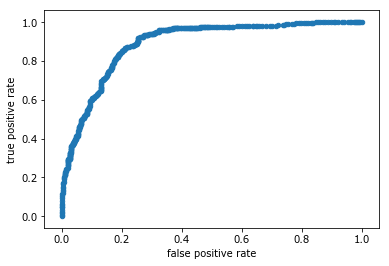

In [67]:
# выводим ROC-кривую для контрольной выборки
tmp = glm_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 'true positive rate': tmp[1]})
df.plot(kind='scatter', x='false positive rate', y='true positive rate')

## III.7. Вывод таблицы коэффициентов 

In [68]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-0.298639,-0.298639
1,pay_gender_marital.Auto + Muzhskoj + Odinokij,-0.782293,-0.782293
2,pay_gender_marital.Auto + Muzhskoj + Zhenat,0.000000,0.000000
3,pay_gender_marital.Auto + Zhenskij + Odinokij,-0.150196,-0.150196
4,pay_gender_marital.Auto + Zhenskij + Zhenat,0.507184,0.507184
5,pay_gender_marital.CC + Muzhskoj + Odinokij,0.000000,0.000000
6,pay_gender_marital.CC + Muzhskoj + Zhenat,0.000000,0.000000
7,pay_gender_marital.CC + Zhenskij + Odinokij,0.179907,0.179907
8,pay_gender_marital.CC + Zhenskij + Zhenat,0.000000,0.000000
9,pay_gender_marital.CH + Muzhskoj + Odinokij,0.450573,0.450573


## III.7. Добавление взаимодействий признаков в модель

In [69]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family='binomial', 
                                           interactions=['pay', 'billtype', 'marital'])
# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [70]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1553689184598_4


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13106537881988237
RMSE: 0.3620295275524945
LogLoss: 0.41037642980289857
Null degrees of freedom: 3101
Residual degrees of freedom: 3064
Null deviance: 4249.593703095778
Residual deviance: 2545.9753704971827
AIC: 2621.9753704971827
AUC: 0.8907452975979939
pr_auc: 0.8402600092415227
Gini: 0.7814905951959878
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41891640021509363: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1288.0,461.0,0.2636,(461.0/1749.0)
Uhodit,113.0,1240.0,0.0835,(113.0/1353.0)
Total,1401.0,1701.0,0.185,(574.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4189164,0.8120498,237.0
max f2,0.2323351,0.8896335,289.0
max f0point5,0.5694847,0.7849445,173.0
max accuracy,0.4977734,0.8223727,205.0
max precision,0.9949927,1.0,0.0
max recall,0.0303160,1.0,384.0
max specificity,0.9949927,1.0,0.0
max absolute_mcc,0.4189164,0.6506105,237.0
max min_per_class_accuracy,0.5217017,0.8124643,196.0
max mean_per_class_accuracy,0.4189164,0.8264514,237.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0109607,0.9881387,2.2926829,2.2926829,1.0,0.9903989,1.0,0.9903989,0.0251293,0.0251293,129.2682927,129.2682927
,2,0.0203095,0.9860893,2.2136249,2.2562911,0.9655172,0.9869639,0.9841270,0.9888177,0.0206948,0.0458241,121.3624895,125.6291134
,3,0.0303030,0.9834618,2.2926829,2.2682927,1.0,0.9849587,0.9893617,0.9875451,0.0229120,0.0687361,129.2682927,126.8292683
,4,0.0406190,0.9804991,2.2926829,2.2744870,1.0,0.9820962,0.9920635,0.9861612,0.0236511,0.0923873,129.2682927,127.4487031
,5,0.0506125,0.9783332,1.8489378,2.1904614,0.8064516,0.9796232,0.9554140,0.9848703,0.0184775,0.1108647,84.8937844,119.0461395
,6,0.1005803,0.9543977,2.0560189,2.1236710,0.8967742,0.9677127,0.9262821,0.9763465,0.1027347,0.2135994,105.6018883,112.3671044
,7,0.1502257,0.8763496,1.8311688,2.0270072,0.7987013,0.9192946,0.8841202,0.9574924,0.0909091,0.3045085,83.1168831,102.7007223
,8,0.2001934,0.7656081,1.9376869,2.0047131,0.8451613,0.8137186,0.8743961,0.9216068,0.0968219,0.4013304,93.7686861,100.4713091
,9,0.3004513,0.6309218,1.6292056,1.8794096,0.7106109,0.6855869,0.8197425,0.8428491,0.1633407,0.5646711,62.9205553,87.9409610
,10,0.4003868,0.5658201,1.6640441,1.8256549,0.7258065,0.5958356,0.7962963,0.7811952,0.1662971,0.7309682,66.4044060,82.5654923




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.13136640679970216
RMSE: 0.3624450396952649
LogLoss: 0.41283589878040494
Null degrees of freedom: 1328
Residual degrees of freedom: 1291
Null deviance: 1821.8635267830318
Residual deviance: 1097.3178189583164
AIC: 1173.3178189583164
AUC: 0.8911441872875235
pr_auc: 0.8454408210757773
Gini: 0.7822883745750471
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4974246611173884: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,593.0,154.0,0.2062,(154.0/747.0)
Uhodit,77.0,505.0,0.1323,(77.0/582.0)
Total,670.0,659.0,0.1738,(231.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4974247,0.8138598,210.0
max f2,0.2323351,0.8890290,291.0
max f0point5,0.5217416,0.7859910,200.0
max accuracy,0.4991045,0.8261851,209.0
max precision,0.9942405,1.0,0.0
max recall,0.0305106,1.0,380.0
max specificity,0.9942405,1.0,0.0
max absolute_mcc,0.4974247,0.6564438,210.0
max min_per_class_accuracy,0.5321120,0.8152610,195.0
max mean_per_class_accuracy,0.4974247,0.8307698,210.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,58 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9894869,2.2835052,2.2835052,1.0,0.9915640,1.0,0.9915640,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0203160,0.9862030,2.2835052,2.2835052,1.0,0.9876861,1.0,0.9896969,0.0223368,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9835175,1.9321967,2.1693299,0.8461538,0.9853688,0.95,0.9882902,0.0189003,0.0652921,93.2196669,116.9329897
,4,0.0413845,0.9813336,2.2835052,2.2004686,1.0,0.9820808,0.9636364,0.9865968,0.0257732,0.0910653,128.3505155,120.0468604
,5,0.0511663,0.9798322,2.2835052,2.2163432,1.0,0.9803488,0.9705882,0.9854023,0.0223368,0.1134021,128.3505155,121.6343238
,6,0.1000752,0.9636619,2.0375892,2.1289822,0.8923077,0.9720982,0.9323308,0.9789003,0.0996564,0.2130584,103.7589215,112.8982249
,7,0.1504891,0.8881686,1.8745192,2.0437371,0.8208955,0.9361346,0.895,0.9645738,0.0945017,0.3075601,87.4519157,104.3737113
,8,0.2001505,0.7658652,1.8683224,2.0002132,0.8181818,0.8134196,0.8759398,0.9270694,0.0927835,0.4003436,86.8322399,100.0213162
,9,0.3002257,0.6452202,1.7512596,1.9172286,0.7669173,0.6954392,0.8395990,0.8498593,0.1752577,0.5756014,75.1259592,91.7228639
,10,0.4010534,0.5740822,1.5166564,1.8165219,0.6641791,0.6066043,0.7954972,0.7887033,0.1529210,0.7285223,51.6656409,81.6521924



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-03-27 15:19:50,0.000 sec,0,2124.7968515,0.6849764
,2019-03-27 15:19:50,0.023 sec,1,1375.3055278,0.4445975
,2019-03-27 15:19:50,0.030 sec,2,1284.2425461,0.4159759
,2019-03-27 15:19:50,0.037 sec,3,1273.4502092,0.4129013
,2019-03-27 15:19:50,0.042 sec,4,1272.9935175,0.4128295
,2019-03-27 15:19:50,0.046 sec,5,1272.9876852,0.4128296


## III.8. Вычисление p-значений коэффициентов

In [71]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_=0, family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, 
                 training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-2.746986,0.431811,-6.361545,1.997350e-10,-2.746986
1,pay_gender_marital.Auto + Muzhskoj + Zhenat,0.845139,0.423041,1.997770,4.574159e-02,0.845139
2,pay_gender_marital.Auto + Zhenskij + Odinokij,-5.833642,41.384633,-0.140962,8.879003e-01,-5.833642
3,pay_gender_marital.Auto + Zhenskij + Zhenat,-5.157181,41.384468,-0.124616,9.008273e-01,-5.157181
4,pay_gender_marital.CC + Muzhskoj + Odinokij,1.216680,0.385137,3.159081,1.582674e-03,1.216680
5,pay_gender_marital.CC + Muzhskoj + Zhenat,1.171911,0.379570,3.087473,2.018663e-03,1.171911
6,pay_gender_marital.CC + Zhenskij + Odinokij,-5.142318,41.384227,-0.124258,9.011111e-01,-5.142318
7,pay_gender_marital.CC + Zhenskij + Zhenat,-5.366324,41.383984,-0.129672,8.968263e-01,-5.366324
8,pay_gender_marital.CH + Muzhskoj + Odinokij,1.675783,0.423031,3.961368,7.452150e-05,1.675783
9,pay_gender_marital.CH + Muzhskoj + Zhenat,0.908322,0.428689,2.118835,3.410440e-02,0.908322


## III.9. Решетчатый поиск

In [73]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda_ - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', 
                                                         lambda_search=True),
                           grid_id='grid_res', hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [74]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha          model_ids              logloss
0     [0.6]   grid_res_model_7   0.4189745764985536
1     [0.7]   grid_res_model_8  0.41898513319425795
2     [0.8]   grid_res_model_9   0.4190004359532508
3     [0.5]   grid_res_model_6  0.41900712916463434
4     [0.4]   grid_res_model_5   0.4190161969945375
5     [0.9]  grid_res_model_10  0.41902846058252763
6     [1.0]  grid_res_model_11   0.4190502830199705
7     [0.3]   grid_res_model_4    0.419066037461718
8     [0.2]   grid_res_model_3  0.41910878412014463
9     [0.1]   grid_res_model_2  0.41915156269128545
10    [0.0]   grid_res_model_1   0.4192133080916641


In [75]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha          model_ids                 auc
0     [0.4]   grid_res_model_5  0.8837874625432672
1     [0.5]   grid_res_model_6  0.8837627414165924
2     [0.6]   grid_res_model_7  0.8837481622906047
3     [0.0]   grid_res_model_1  0.8837164685384573
4     [0.3]   grid_res_model_4  0.8837120314131567
5     [0.7]   grid_res_model_8  0.8836904796616967
6     [0.9]  grid_res_model_10  0.8836883667448868
7     [1.0]  grid_res_model_11  0.8836807602443715
8     [0.8]   grid_res_model_9  0.8836716747020893
9     [0.2]   grid_res_model_3  0.8836657585350218
10    [0.1]   grid_res_model_2  0.8836488552005433


## III.10. Извлечение наилучшей модели по итогам решетчатого поиска

In [76]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  grid_res_model_5


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1312635651656249
RMSE: 0.3623031398782308
LogLoss: 0.4114501507531722
Null degrees of freedom: 3101
Residual degrees of freedom: 3067
Null deviance: 4249.593703095778
Residual deviance: 2552.63673527268
AIC: 2622.63673527268
AUC: 0.8902398878970857
pr_auc: 0.8395568479325041
Gini: 0.7804797757941715
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43703906153284067: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1304.0,445.0,0.2544,(445.0/1749.0)
Uhodit,115.0,1238.0,0.085,(115.0/1353.0)
Total,1419.0,1683.0,0.1805,(560.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4370391,0.8155468,236.0
max f2,0.2316384,0.8898769,290.0
max f0point5,0.5290052,0.7890161,194.0
max accuracy,0.4859177,0.8207608,214.0
max precision,0.9942735,1.0,0.0
max recall,0.0385151,1.0,379.0
max specificity,0.9942735,1.0,0.0
max absolute_mcc,0.4370391,0.6575535,236.0
max min_per_class_accuracy,0.5204000,0.8187536,199.0
max mean_per_class_accuracy,0.4370391,0.8302863,236.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0109607,0.9878815,2.2926829,2.2926829,1.0,0.9897212,1.0,0.9897212,0.0251293,0.0251293,129.2682927,129.2682927
,2,0.0209542,0.9849567,2.2187254,2.2574109,0.9677419,0.9860459,0.9846154,0.9879684,0.0221729,0.0473023,121.8725413,125.7410882
,3,0.0303030,0.9824323,2.2926829,2.2682927,1.0,0.9837762,0.9893617,0.9866751,0.0214339,0.0687361,129.2682927,126.8292683
,4,0.0406190,0.9797901,2.2926829,2.2744870,1.0,0.9810527,0.9920635,0.9852472,0.0236511,0.0923873,129.2682927,127.4487031
,5,0.0502901,0.9768398,1.9869919,2.2191995,0.8666667,0.9786739,0.9679487,0.9839831,0.0192166,0.1116038,98.6991870,121.9199500
,6,0.1005803,0.9524017,1.9546592,2.0869293,0.8525641,0.9662283,0.9102564,0.9751057,0.0983001,0.2099039,95.4659162,108.6929331
,7,0.1505480,0.8720843,1.9081039,2.0275761,0.8322581,0.9184970,0.8843683,0.9563169,0.0953437,0.3052476,90.8103855,102.7576122
,8,0.2001934,0.7589414,1.8758315,1.9899454,0.8181818,0.8062955,0.8679549,0.9191135,0.0931264,0.3983740,87.5831486,98.9945407
,9,0.3001289,0.6310494,1.6492526,1.8765031,0.7193548,0.6812755,0.8184748,0.8399193,0.1648189,0.5631929,64.9252557,87.6503104
,10,0.4007092,0.5605209,1.6166354,1.8112748,0.7051282,0.5922171,0.7900241,0.7777447,0.1626016,0.7257945,61.6635397,81.1274846




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1340614695616144
RMSE: 0.3661440557507583
LogLoss: 0.4190161969945375
Null degrees of freedom: 3101
Residual degrees of freedom: 3069
Null deviance: 4251.626695674246
Residual deviance: 2599.576486154111
AIC: 2665.576486154111
AUC: 0.8837874625432672
pr_auc: 0.8326856413665233
Gini: 0.7675749250865345
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40007025574303196: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1256.0,493.0,0.2819,(493.0/1749.0)
Uhodit,97.0,1256.0,0.0717,(97.0/1353.0)
Total,1353.0,1749.0,0.1902,(590.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4000703,0.8098001,245.0
max f2,0.2110840,0.8885398,292.0
max f0point5,0.5181649,0.7724264,194.0
max accuracy,0.4443682,0.8120567,228.0
max precision,0.9942640,1.0,0.0
max recall,0.0343981,1.0,382.0
max specificity,0.9942640,1.0,0.0
max absolute_mcc,0.3779463,0.6468376,252.0
max min_per_class_accuracy,0.5201578,0.8063562,193.0
max mean_per_class_accuracy,0.4000703,0.8232161,245.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,65 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9881287,2.2926829,2.2926829,1.0,0.9904312,1.0,0.9904312,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9849632,2.2187254,2.2562911,0.9677419,0.9861949,0.9841270,0.9883467,0.0221729,0.0458241,121.8725413,125.6291134
,3,0.0303030,0.9818728,2.2926829,2.2682927,1.0,0.9834005,0.9893617,0.9867155,0.0229120,0.0687361,129.2682927,126.8292683
,4,0.0402966,0.9802059,2.1447679,2.2376585,0.9354839,0.9810058,0.976,0.9852995,0.0214339,0.0901700,114.4767899,123.7658537
,5,0.0502901,0.9771013,2.1447679,2.2191995,0.9354839,0.9787990,0.9679487,0.9840077,0.0214339,0.1116038,114.4767899,121.9199500
,6,0.1002579,0.9524322,1.9376869,2.0788958,0.8451613,0.9659363,0.9067524,0.9750011,0.0968219,0.2084257,93.7686861,107.8895773
,7,0.1502257,0.8756972,1.9672699,2.0417670,0.8580645,0.9181719,0.8905579,0.9560987,0.0983001,0.3067258,96.7269866,104.1766984
,8,0.2001934,0.7531131,1.8341463,1.9899454,0.8,0.8053965,0.8679549,0.9184838,0.0916482,0.3983740,83.4146341,98.9945407
,9,0.3001289,0.6273419,1.5531078,1.8444893,0.6774194,0.6829480,0.8045113,0.8400562,0.1552106,0.5535846,55.3107789,84.4489272
,10,0.4000645,0.5600233,1.6344611,1.7920245,0.7129032,0.5924438,0.7816277,0.7782030,0.1633407,0.7169254,63.4461054,79.2024528



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8154944,0.0107232,0.8089888,0.8330684,0.8265306,0.7897351,0.8191490
auc,0.8843628,0.0062399,0.8724369,0.8973857,0.8814418,0.8794724,0.8910773
err,0.1845056,0.0107232,0.1910112,0.1669316,0.1734694,0.2102649,0.1808511
err_count,114.4,6.6573267,119.0,105.0,102.0,127.0,119.0
f0point5,0.7574941,0.0169194,0.7587434,0.7876106,0.7663317,0.7142857,0.7604994
---,---,---,---,---,---,---,---
r2,0.4542240,0.0144975,0.4293371,0.4820937,0.4573883,0.4327548,0.4695458
recall,0.9329190,0.0084194,0.9175627,0.9303136,0.953125,0.9265306,0.9370629
residual_deviance,519.3668,15.94736,545.06537,513.0447,486.3077,508.0935,544.32294
rmse,0.3660338,0.0043573,0.3756498,0.3584503,0.3652214,0.3698100,0.3610377



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2019-03-27 15:19:55,0.000 sec,1,",39E0",1,1.3699528,nan,1.3705044,0.0041932
,2019-03-27 15:19:55,0.000 sec,3,",35E0",2,1.3608191,nan,1.3698415,0.0044106
,2019-03-27 15:19:55,0.001 sec,5,",32E0",3,1.3488125,nan,1.3697927,0.0044538
,2019-03-27 15:19:55,0.002 sec,7,",29E0",5,1.3340086,nan,1.3652796,0.0053539
,2019-03-27 15:19:55,0.003 sec,9,",27E0",5,1.3052134,nan,1.3557633,0.0052958
---,---,---,---,---,---,---,---,---,---
,2019-03-27 15:19:55,0.095 sec,108,",76E-3",35,0.8230767,nan,0.8381178,0.0102493
,2019-03-27 15:19:55,0.096 sec,109,",7E-3",35,0.8229816,nan,0.8381331,0.0102750
,2019-03-27 15:19:55,0.097 sec,110,",63E-3",35,0.8229003,nan,0.8381159,0.0102880
,2019-03-27 15:19:55,0.099 sec,111,",58E-3",35,0.8228222,nan,0.8381267,0.0103037



See the whole table with table.as_data_frame()


In [77]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.8901321206935416


In [78]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Elastic Net (alpha = 0.4, lambda = 6.34E-4 )']

# Этап IV. Построение модели логистической регрессии на всей исторической выборке и применение к новым данным с помощью класса H2OGeneralizedLinearEstimator библиотеки h2o

## IV.1. Транслитерация строковых значений в предварительно подготовленных исторических данных

In [79]:
# выполняем транслитерацию
for i in cat_cols:
    fulldata[i] = fulldata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.2. Преобразование всех предварительно подготовленных исторических данных во фрейм H2O

In [80]:
# преобразовываем датафрейм pandas во фрейм h2o -
# специальную структуру данных, используемую h2o
fullframe = h2o.H2OFrame(fulldata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## IV.3. Обучение модели логистической регрессии на всех исторических данных

In [81]:
# создаем и обучаем модель
full_glm_model = H2OGeneralizedLinearEstimator(family='binomial', solver='IRLSM', 
                                               model_id='logreg_churn', alpha=0.4, lambda_=6.34E-4)
full_glm_model.train(predictors, dependent, 
                     training_frame=fullframe)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [82]:
# смотрим модель
full_glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_churn


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1312225339206356
RMSE: 0.36224650988054474
LogLoss: 0.4121184912861066
Null degrees of freedom: 4430
Residual degrees of freedom: 4395
Null deviance: 6071.452249213392
Residual deviance: 3652.1940697774776
AIC: 3724.1940697774776
AUC: 0.8903373045451534
pr_auc: 0.8410821233769914
Gini: 0.7806746090903067
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3931176630074103: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1816.0,680.0,0.2724,(680.0/2496.0)
Uhodit,129.0,1806.0,0.0667,(129.0/1935.0)
Total,1945.0,2486.0,0.1826,(809.0/4431.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3931177,0.8170097,253.0
max f2,0.2285821,0.8898750,294.0
max f0point5,0.5142965,0.7825296,204.0
max accuracy,0.4617979,0.8226134,229.0
max precision,0.9952512,1.0,0.0
max recall,0.0378574,1.0,380.0
max specificity,0.9952512,1.0,0.0
max absolute_mcc,0.3931177,0.6605208,253.0
max min_per_class_accuracy,0.5069301,0.8137019,208.0
max mean_per_class_accuracy,0.4175401,0.8310059,247.0


Gains/Lift Table: Avg response rate: 43,67 %, avg score: 43,67 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101557,0.9899528,2.2899225,2.2899225,1.0,0.9920478,1.0,0.9920478,0.0232558,0.0232558,128.9922481,128.9922481
,2,0.0203114,0.9878026,2.1372610,2.2135917,0.9333333,0.9886972,0.9666667,0.9903725,0.0217054,0.0449612,113.7260982,121.3591731
,3,0.0304672,0.9840297,2.2899225,2.2390353,1.0,0.9854185,0.9777778,0.9887212,0.0232558,0.0682171,128.9922481,123.9035314
,4,0.0406229,0.9816804,2.2899225,2.2517571,1.0,0.9826842,0.9833333,0.9872119,0.0232558,0.0914729,128.9922481,125.1757106
,5,0.0501016,0.9786003,2.1263566,2.2280327,0.9285714,0.9801009,0.9729730,0.9858666,0.0201550,0.1116279,112.6356589,122.8032684
,6,0.1006545,0.9556144,1.9832364,2.1050857,0.8660714,0.9684877,0.9192825,0.9771382,0.1002584,0.2118863,98.3236434,110.5085688
,7,0.1500790,0.8803660,1.9134969,2.0419910,0.8356164,0.9220914,0.8917293,0.9590100,0.0945736,0.3064599,91.3496867,104.1991024
,8,0.2006319,0.7598513,1.8810078,2.0014283,0.8214286,0.8148275,0.8740157,0.9226806,0.0950904,0.4015504,88.1007752,100.1428310
,9,0.3001580,0.6290402,1.6512366,1.8853121,0.7210884,0.6864829,0.8233083,0.8443624,0.1643411,0.5658915,65.1236619,88.5312118
,10,0.4001354,0.5516175,1.5507376,1.8017157,0.6772009,0.5896731,0.7868020,0.7807260,0.1550388,0.7209302,55.0737572,80.1715657



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-03-27 15:20:04,0.000 sec,0,3035.7261246,0.6851108
,2019-03-27 15:20:04,0.002 sec,1,1976.9019442,0.4481504
,2019-03-27 15:20:04,0.004 sec,2,1843.9152818,0.4194981
,2019-03-27 15:20:04,0.005 sec,3,1827.3197531,0.4164962
,2019-03-27 15:20:04,0.006 sec,4,1826.4358526,0.4164334
,2019-03-27 15:20:04,0.007 sec,5,1826.4222641,0.4164339
,2019-03-27 15:20:04,0.009 sec,6,1826.1003628,0.4163810
,2019-03-27 15:20:04,0.010 sec,7,1826.0970349,0.4163810


In [83]:
# при желании модель можно сохранить в папку
# и воспользоваться ей позднее, когда 
# появятся новые данные
h2o.save_model(full_glm_model, path='mybest_model', force=True)

'/Users/artemgruzdev/Learning_pandas_russian_translation/Notebooks/mybest_model/logreg_churn'

## IV.4. Транслитерация строковых значений в предварительно подготовленных новых данных

In [84]:
# выполняем транслитерацию
cat_cols.remove('churn')
for i in cat_cols:
    newdata[i] = newdata[i].apply(lambda x: translit(x, 'ru', reversed=True))

## IV.5. Преобразование новых данных во фрейм H2O

In [85]:
# преобразовываем датафрейм pandas с новыми данными во фрейм h2o -
# специальную структуру данных, используемую h2o
newframe = h2o.H2OFrame(newdata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## IV.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [86]:
# вычисляем вероятности классов для новых данных
predictions = full_glm_model.predict(newframe)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,Ostaetsja,Uhodit
Uhodit,0.0363637,0.963636
Uhodit,0.0341141,0.965886
Ostaetsja,0.950578,0.0494221
Ostaetsja,0.956241,0.0437585
Uhodit,0.0129093,0.987091
Ostaetsja,0.889182,0.110818
Uhodit,0.511276,0.488724
Uhodit,0.131215,0.868785
Uhodit,0.246531,0.753469
Uhodit,0.261172,0.738828


In [87]:
# а еще можно выгрузить ранее сохраненную модель
# и применить к новым данным
savedmodel = h2o.load_model(path='/Users/artemgruzdev/'
                            'Learning_pandas_russian_translation/'
                            'Notebooks/mybest_model/logreg_churn')
predictions2 = savedmodel.predict(newframe)
predictions2

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,Ostaetsja,Uhodit
Uhodit,0.0363637,0.963636
Uhodit,0.0341141,0.965886
Ostaetsja,0.950578,0.0494221
Ostaetsja,0.956241,0.0437585
Uhodit,0.0129093,0.987091
Ostaetsja,0.889182,0.110818
Uhodit,0.511276,0.488724
Uhodit,0.131215,0.868785
Uhodit,0.246531,0.753469
Uhodit,0.261172,0.738828


#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta